# Исследование объявлений о продаже квартир

Исследуем данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
Задача — научиться определять рыночную стоимость объектов недвижимости. Необходимо установить параметры, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим датасет. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


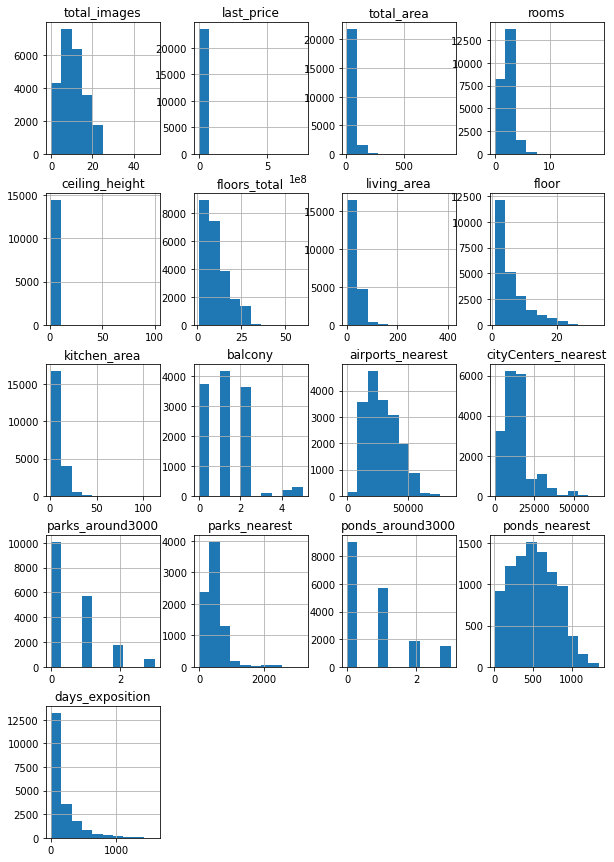

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

display(data.info())
display(data.head(10))
data.hist(figsize=(10, 15))
plt.show()

### Предобработка данных

#### Обработка пропусков

На первый взгляд (по info) пропусков довольно много. Отобразим их количество в процетах, подсветим их градиентом для облегчения восприятия.

In [48]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


1) Первый столбец, в котором есть пропуски, причем почти 10000, это высота потолков. Поскольку у нас нет данных о годах постройки или моделях домов, тяжело определить, на какие типичные значения можно было бы заменить пропуски,  высота потолка зависит от типа дома, его архитектуры, а не от статистики. Тем не менее, поскольку мы рискуем потерять треть данных, лучше заполнить пропуски хотя бы медианой по населенному пункту.

In [49]:
for l in data['locality_name'].unique():
    data.loc[(data['locality_name'] == l) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == l), 'ceiling_height'].median()    
data['ceiling_height'].isna().sum()
#data['ceiling_height']

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

156

Предупреждения сввязаны с тем, что заполнение медианой не избавило нас от всех пропусков из-за некоторого количества пропусков в locality_name. Но эти 156 оставшихся можно и удалить, это очень малая часть от датасета.

In [50]:
data = data.dropna(subset=['ceiling_height'])
# data['ceiling_height'].isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23543 non-null  int64  
 1   last_price            23543 non-null  float64
 2   total_area            23543 non-null  float64
 3   first_day_exposition  23543 non-null  object 
 4   rooms                 23543 non-null  int64  
 5   ceiling_height        23543 non-null  float64
 6   floors_total          23459 non-null  float64
 7   living_area           21669 non-null  float64
 8   floor                 23543 non-null  int64  
 9   is_apartment          2754 non-null   object 
 10  studio                23543 non-null  bool   
 11  open_plan             23543 non-null  bool   
 12  kitchen_area          21302 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23529 non-null  object 
 15  airports_nearest   

2) Выглядит логичным предположить, что пропуски в столбце про число балконов эквивалентны отсутствию балконов. 
Поэтому заменим пропуски на 0 и проверим, что операция произведена корректно.

In [51]:
data['balcony'].isna().sum()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

3) Следующий столбец с пропусками - общее количество этажей. 
На первый взгляд кажется, что здесь тоже придется оставить пропуски, но сначала взглянем на строки с пропусками в этом столбце.

In [52]:
data.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.80,4,NaN,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.7,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.7,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.7,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Гипотеза не подтвердилась: если бы в выдаче присутствовали только помещения на 1 этаже, можно было бы предположить, что речь идет о частных одноэтажных домах.
Заполним пропуски медианным значением этажей для домов в том или ином населенном пункте.
Однако, для случаев, когда медианное значение окажется ниже, чем высокий этаж в отдельном доме, будем считать, что квартира находится на последнем этаже (лучше так, чем квартира выше общего количества этажей).

In [53]:
median_floors = data.groupby('locality_name')['floors_total'].transform('median')
for line in data['floor']:
    if data['floor'][line] <= median_floors[line]:
        data['floors_total'] = data['floors_total'].fillna(median_floors[line])
    else:
        data['floors_total'] = data['floors_total'].fillna(data['floor'][line])
data['floors_total'].isna().sum()

0

4) Пропуски в living_area : проверяем гипотезу, что значение не указано у студий, где жилая площадь и МОП соединены.

In [54]:
display(data[['total_area', 'living_area']])

,total_area,living_area
0,108.00,51.0
1,40.40,18.6
2,56.00,34.3
3,159.00,NaN
4,100.00,32.0
...,...,...
23693,62.40,40.0
23694,133.81,73.3
23695,59.00,38.0
23697,76.75,NaN


Гипотеза не подтвердилась: видим в т.ч. квартиры с большой площадью, явно многокомнатные.
Оставляем эти пропуски, так как не определить принцип, по которому их заполнять.

5) столбец is_apartment. Зная, что тип данных в столбце - строки (object), проверим, какие значения в нем встречаются.

In [55]:
display(data['is_apartment'].unique()) # помимо True и False встречаем 'nan'. 

# Если специально не ввели значение, значит точно не апартаменты. 
# Избавимся от nan: превратим их в False, а тип данных в столбце - в булев.
data['is_apartment'].value_counts()
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data['is_apartment'].unique())
display(data['is_apartment'].isna().sum())

data.info() # видим, что столбец is_apartment превратился в булев

array([nan, False, True], dtype=object)

array([False,  True])

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23543 non-null  int64  
 1   last_price            23543 non-null  float64
 2   total_area            23543 non-null  float64
 3   first_day_exposition  23543 non-null  object 
 4   rooms                 23543 non-null  int64  
 5   ceiling_height        23543 non-null  float64
 6   floors_total          23543 non-null  float64
 7   living_area           21669 non-null  float64
 8   floor                 23543 non-null  int64  
 9   is_apartment          23543 non-null  bool   
 10  studio                23543 non-null  bool   
 11  open_plan             23543 non-null  bool   
 12  kitchen_area          21302 non-null  float64
 13  balcony               23543 non-null  float64
 14  locality_name         23529 non-null  object 
 15  airports_nearest   

6) Подобно жилой площади, сверим пропуски в графе "площадь кухни" на совпадение со студиями.

In [56]:
display(data[['total_area', 'kitchen_area', 'studio']].query('kitchen_area.isna()'))
# гипотеза вновь не подтвердилась, чем можно было бы заполнить значения - непонятно, так как площадь кухни тоже не зависит от "средней по больнице"

,total_area,kitchen_area,studio
3,159.0,NaN,False
30,32.8,NaN,False
37,45.8,NaN,False
44,40.0,NaN,False
59,46.5,NaN,False
...,...,...,...
23642,80.3,NaN,False
23655,40.5,NaN,False
23663,88.0,NaN,False
23670,45.6,NaN,False


7. Столбец locality_name. 
Даже если в глаза бросаются несколько совпадений в строках без locality_name и на расстоянии 22041.0 от аэропорта, а остальные строки с этим расстоянием - в Санкт-Петербурге, их количество ничтожно мало (как и общее количество пропусков по locality_name - 49), так что можно не выдумывать сложную функцию для их заполнения. Просто удалим эти строки.

In [57]:

display(data.query('locality_name.isna()'))
data.query('airports_nearest == 22041.0')

data = data.dropna(subset=['locality_name'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
9821,13,8000000.0,94.5,2015-01-21T00:00:00,4,3.00,2.0,57.80,2,False,...,11.30,0.0,NaN,24953.0,3801.0,1.0,375.0,2.0,532.0,531.0
13223,1,2919911.0,29.4,2015-03-12T00:00:00,1,2.75,24.0,21.10,2,False,...,NaN,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,470.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.60,1,False,...,8.00,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
14273,2,4422000.0,60.0,2016-03-23T00:00:00,2,2.75,23.0,32.00,14,False,...,11.90,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0
15866,10,3950000.0,44.0,2016-04-16T00:00:00,2,2.70,5.0,28.50,5,False,...,5.50,1.0,NaN,36380.0,9497.0,1.0,634.0,3.0,513.0,85.0
16610,11,11940000.0,112.0,2015-11-19T00:00:00,3,3.00,5.0,64.00,2,False,...,23.00,0.0,NaN,21219.0,1322.0,1.0,740.0,3.0,365.0,319.0
18526,3,10800000.0,86.0,2016-06-24T00:00:00,4,3.20,7.0,48.00,2,False,...,12.00,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,65.0


С другими "географическими" столбцами ситуация похожая: совершенно непонятно, как их заполнять, кроме как считать по карте расстояния. При этом, количество пропусков везде примерно одинаковое (в районе 5500).

Что касается parks_nearest и ponds_nearest, пропуски в них обусловлены отсутствием парков/водоемов поблизости (то есть 0 в предыдущем столбце), а заполнить их нельзя, так как 0 в метрах будет значить, что квартира находится прямо в озере/парке, что невозможно.

In [58]:
display(data.loc[data['airports_nearest'].isna()])
display(data.query('cityCenters_nearest.isna()'))
display(data.query('parks_around3000.isna()'))
display(data.query('ponds_around3000.isna()'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.00,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.00,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.00,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.00,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Наконец, столбец days_exposition. Разумно выглядит предположить, что пропуски в нем можно заполнить медианным значением по населенному пункту.

In [59]:
data['days_exposition'].value_counts()

45.0      859
60.0      537
7.0       233
30.0      208
90.0      203
         ... 
1.0         1
1147.0      1
1148.0      1
1345.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [60]:
data.query('days_exposition.isna()')
data['days_exposition'] = data['days_exposition'].fillna(data.groupby('locality_name')['days_exposition'].transform('median'))
data.query('days_exposition.isna()')
# после заполнения пропусков у нас остались еще несколько
data.query('locality_name == "Мурино"')
# проверка одного из населенных пунктов с незаполненным days_exposition показывает, что второй строке кода из этой
# ячейки просто неоткуда было взять медианное значение: для всех квартир в Мурино эти данные отсутствуют. 
# Логично предположить, что для остальных оставшихся пропусков тоже.
# Заполним их медианным значением по всему датасету.
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
display(data.query('days_exposition.isna()'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [61]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1874
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2240
balcony                     0
locality_name               0
airports_nearest         5418
cityCenters_nearest      5395
parks_around3000         5394
parks_nearest           15465
ponds_around3000         5394
ponds_nearest           14446
days_exposition             0
dtype: int64

С заполнением пропусков покончено. Но откуда они могли появиться?
Полагаю, отчасти - из-за невнимательности или спешки риэлторов и продавцов, размещавших объявления: не успели проверить высоту потолков, площадь кухни или жилую (другие мои гипотезы про эти столбцы не подтвердились), поленились указать число балконов (хотя могли при этом разместить соответствующие фото).
Пропуски в графе is_apartment могут объясняться тем, что в объявлениях "галочкой" отмечали только те объекты на продажу, которые имеют статус апартаментов, а при переносе в датасет остальным не прописали параметр "False", поэтому столбец изначально не булева типа.  

С картографическими данными сложнее: последовательности в их отсутствии на первый взгляд выявить не удалось (цифр по расстояниям в метрах нет, например, не только вне Петербурга). Возможно, риэлторам надо было указать точку на карте, а они с пренебрежением относились к этому этапу публикации объявления. 
Что касается parks_nearest и ponds_nearest, пропуски в них обусловлены отсутствием парков/водоемов поблизости (то есть 0 в предыдущем столбце), а заполнить их нельзя, так как 0 в метрах будет значить, что квартира находится прямо в озере/парке, что невозможно.

#### Изменение типов данных
Преобразуем вещественные числа в целые там, где это возможно (по естественным причинам невозможно в столбцах с площадью/высотой потолков, в силу несовершенства датасета - пропуски - в столбцах с картографическими данными).
Дату публикации объявления переведем из строкового формата в datetime.

#### Поиск неявных дубликатов

Некоторые названия населённых пунктов схожи. Заменим все «ё» на «е» и удалим служебные слова, чтобы больше вариантов наименований населённого пункта совпали между собой.

In [63]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'се

In [64]:
data.duplicated().sum() # совсем идентичных строк в датасете нет

data['locality_name'] = data['locality_name'].str.replace("ё", "е")
data['locality_name'] = data['locality_name'].str.replace("поселок ", "")
data['locality_name'] = data['locality_name'].str.replace("городской ", "")
data['locality_name'] = data['locality_name'].str.replace("деревня ", "")
data['locality_name'] = data['locality_name'].str.replace("городского типа ", "")
data['locality_name'] = data['locality_name'].str.replace("при железнодорожной станции ", "")
data['locality_name'] = data['locality_name'].str.replace("станции ", "")
data['locality_name'] = data['locality_name'].str.replace("село ", "")
data['locality_name'] = data['locality_name'].str.replace("садовое товарищество ", "")
data['locality_name'] = data['locality_name'].str.replace("садоводческое некоммерческое товарищество ", "")
data['locality_name'] = data['locality_name'].str.replace("коттеджный ", "")

data['locality_name'].unique()
data['locality_name'].nunique() # сократили около 40 неявных дубликатов

241

#### Поиск аномальных значений

Начнём с высоты потолков. Законодательные нормы (СНИП) составляют от 2.5 метров (допустим отклонения на 10 см вниз), верхняя граница, кажется, не установлена.
Допустим, значения от 24 и выше можно поделить на 10 и получить адекватные данные. 
Но что делать с высотой 100, 14, 10.3, 8, 1 и т.п.? проверим строки с этими аномальными значениями.

Детальное изучение строк датасета с такими значениями приводит нас к следующей тактике: от 24 м - поделить на 10, после чего строки с значениями ниже 2 - удалить, выше 6 - удалить как аномальные..

In [65]:
data['ceiling_height'].unique()
data.query('ceiling_height == 100.') # малюсенькие апартаменты за 15 млн недалеко от центра СПб на последнем (5 этаже). Допустим, это особый дизайнерский проект, оставляем, поделив на 10
data.query('ceiling_height == 20') # потолки 20 метров в 17-этажном доме? явно ошибка
data.query('ceiling_height == 10.3') # потолки 10.3 метров в 16-этажном доме? явно ошибка
data.query('ceiling_height == 14') # высота потолка совпадает с количеством этажей (14), вероятно, опечатка
data.query('ceiling_height == 8') # 3 значения, ни одно не кажется адекватным для 5 или 16-этажного дома. В объекте в СПб "8" совпадает с площадью кухни
data.query('ceiling_height == 8.3') # странное значение совпадает с площадью кухни
data.query('ceiling_height == 6') #последний этаж огромной квартиры за 119 млн, значение возможно (мансардные окна, например)
data.query('ceiling_height == 1')# высота в 1 метр невозможна по всем нормам здравого смысла и выглядит ошибкой
data.query('ceiling_height == 1.2') #даже для двухэтажного дома в сельской местности выглядит ошибкой/опечаткой из-за похожих соседних цифр
data.query('ceiling_height == 1.75') #37-этажный дом - явно новостройка, а значит объяснимых отклонений от норм закона быть не может
data.query('ceiling_height == 2') # в основном дешевые предложения в маленьких городах Ленобласти. Странно, но возможно
data.query('ceiling_height == 2.3') # в основном дешевые предложения в маленьких городах Ленобласти. Странно, но возможно
data.query('ceiling_height == 2.34') # сельская местность, там встречается всякое, значение выглядит аутентичным
data.query('ceiling_height == 2.4') # целых 23 значения, выглядит как допустимое отклонение от современных СНИП, если дома ранней застройки

# Резюме: от 24 м - поделить на 10, после чего строки с значениями ниже 2 - удалить, выше 6 - удалить как аномальные.

data.loc[data['ceiling_height'] >= 24.0, 'ceiling_height'] = data.loc[(data['ceiling_height'] >= 24.0), 'ceiling_height'] / 10
data['ceiling_height'].unique()

df = data.query('6.0 >= ceiling_height >= 2.0').reset_index(drop=True)

df.info()
df['ceiling_height'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23514 entries, 0 to 23513
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23514 non-null  int64         
 1   last_price            23514 non-null  int64         
 2   total_area            23514 non-null  float64       
 3   first_day_exposition  23514 non-null  datetime64[ns]
 4   rooms                 23514 non-null  int64         
 5   ceiling_height        23514 non-null  float64       
 6   floors_total          23514 non-null  int64         
 7   living_area           21640 non-null  float64       
 8   floor                 23514 non-null  int64         
 9   is_apartment          23514 non-null  bool          
 10  studio                23514 non-null  bool          
 11  open_plan             23514 non-null  bool          
 12  kitchen_area          21276 non-null  float64       
 13  balcony         

array([2.7  , 2.63 , 3.03 , 2.6  , 2.64 , 2.5  , 2.67 , 2.55 , 2.56 ,
       3.05 , 2.75 , 2.9  , 2.56 , 2.8  , 3.   , 2.65 , 3.2  , 2.61 ,
       3.25 , 3.45 , 2.77 , 2.85 , 2.525, 2.57 , 4.15 , 3.5  , 3.3  ,
       2.71 , 4.   , 2.47 , 2.73 , 2.84 , 3.1  , 2.34 , 3.4  , 2.52 ,
       3.06 , 2.72 , 2.54 , 2.51 , 2.78 , 2.76 , 2.58 , 3.7  , 5.2  ,
       2.87 , 2.66 , 2.59 , 2.   , 2.45 , 3.6  , 3.9  , 2.92 , 3.11 ,
       3.13 , 3.8  , 3.15 , 3.55 , 3.16 , 3.62 , 3.12 , 2.53 , 2.74 ,
       2.96 , 2.46 , 5.3  , 5.   , 2.79 , 2.95 , 4.06 , 2.94 , 3.82 ,
       3.54 , 3.53 , 2.83 , 4.7  , 2.4  , 3.38 , 3.01 , 5.6  , 3.65 ,
       3.18 , 3.35 , 2.3  , 3.57 , 2.48 , 2.515, 2.62 , 2.82 , 2.65 ,
       3.98 , 3.83 , 3.52 , 3.95 , 3.75 , 2.88 , 3.67 , 3.87 , 3.66 ,
       3.85 , 3.86 , 4.19 , 3.24 , 4.8  , 4.5  , 4.2  , 3.36 , 3.08 ,
       3.68 , 3.07 , 3.37 , 3.09 , 3.26 , 3.34 , 2.81 , 3.44 , 2.97 ,
       3.14 , 2.725, 4.37 , 2.68 , 2.6  , 3.22 , 3.27 , 2.675, 4.1  ,
       2.93 , 3.46 ,

Теперь проверим количество этажей, зная, что самое высокое жилое здание в СПб - 37 этажей. Убедились, что строки со значениями 52 и 60 суть исключения, удаляем их.

In [66]:
df['floors_total'].unique()
df.query('floors_total == 60')
df['floors_total'].unique()
df.query('floors_total == 52')

df = df.query('floors_total <= 37').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23512 entries, 0 to 23511
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23512 non-null  int64         
 1   last_price            23512 non-null  int64         
 2   total_area            23512 non-null  float64       
 3   first_day_exposition  23512 non-null  datetime64[ns]
 4   rooms                 23512 non-null  int64         
 5   ceiling_height        23512 non-null  float64       
 6   floors_total          23512 non-null  int64         
 7   living_area           21638 non-null  float64       
 8   floor                 23512 non-null  int64         
 9   is_apartment          23512 non-null  bool          
 10  studio                23512 non-null  bool          
 11  open_plan             23512 non-null  bool          
 12  kitchen_area          21274 non-null  float64       
 13  balcony         

Проверим количество комнат. 

In [67]:
df['rooms'].unique() # смущают значения 0 и от 10
df.query('rooms > 10') # значения удивляют, но в целом пропорциональны площади квартир
no_rooms = (df.loc[(df['rooms'] == 0) & (df['studio'] == False)]) # проверим нули, которые не студии
no_rooms['total_area'].unique() #по площади выглядят как однокомнатные, кроме тех, что больше 40 метров
no_rooms.query('total_area > 40.0') #в квартире на 371 кв.м. пропуски по living_area & kitchen_area : вероятно, все значения были не заполнены
df.loc[(df['total_area'] < 45) & (df['rooms'] == 0), 'rooms'] = 1 # остальным присвоим значение однокомнатных
df.loc[(df['rooms'] == 0) & (df['studio'] == False)]

df = df.loc[(df['rooms'] != 0) & (df['total_area'] != 371.0)].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23507 entries, 0 to 23506
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23507 non-null  int64         
 1   last_price            23507 non-null  int64         
 2   total_area            23507 non-null  float64       
 3   first_day_exposition  23507 non-null  datetime64[ns]
 4   rooms                 23507 non-null  int64         
 5   ceiling_height        23507 non-null  float64       
 6   floors_total          23507 non-null  int64         
 7   living_area           21634 non-null  float64       
 8   floor                 23507 non-null  int64         
 9   is_apartment          23507 non-null  bool          
 10  studio                23507 non-null  bool          
 11  open_plan             23507 non-null  bool          
 12  kitchen_area          21274 non-null  float64       
 13  balcony         

И общую площадь квартиры.

In [68]:
df['total_area'].sort_values()
df.query('total_area > 500') # красиво жить не запретишь

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3099,19,140000000,631.0,2019-03-30,7,2.70,5,NaN,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,95
4206,1,50000000,517.0,2017-10-14,7,2.70,4,332.0,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,95
5318,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14
7959,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078
12774,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,95
15548,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111
19393,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106


Посмотрим и на цены квартир. Меньше полумиллиона стоят маленькие квартиры в сельской местности — нормально. И одна явная аномалия за 13000 т.р.

In [69]:
df['last_price'].sort_values()
df.query('last_price < 500000') # квартира за 12900 - явно аномалия
df = df.query('last_price > 13000')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23506 entries, 0 to 23506
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23506 non-null  int64         
 1   last_price            23506 non-null  int64         
 2   total_area            23506 non-null  float64       
 3   first_day_exposition  23506 non-null  datetime64[ns]
 4   rooms                 23506 non-null  int64         
 5   ceiling_height        23506 non-null  float64       
 6   floors_total          23506 non-null  int64         
 7   living_area           21633 non-null  float64       
 8   floor                 23506 non-null  int64         
 9   is_apartment          23506 non-null  bool          
 10  studio                23506 non-null  bool          
 11  open_plan             23506 non-null  bool          
 12  kitchen_area          21273 non-null  float64       
 13  balcony         

Анализируем жилую площадь.

In [70]:
df['living_area'].sort_values()
df.query('living_area < 9') # неадекватно выглядят значения меньше 8 (даже если те, которые чуть больше, возможно, были перепутаны с площадью кухни)

df = df.loc[(df['living_area'] >= 8) | (df['living_area'].isna())].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23498 entries, 0 to 23497
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23498 non-null  int64         
 1   last_price            23498 non-null  int64         
 2   total_area            23498 non-null  float64       
 3   first_day_exposition  23498 non-null  datetime64[ns]
 4   rooms                 23498 non-null  int64         
 5   ceiling_height        23498 non-null  float64       
 6   floors_total          23498 non-null  int64         
 7   living_area           21625 non-null  float64       
 8   floor                 23498 non-null  int64         
 9   is_apartment          23498 non-null  bool          
 10  studio                23498 non-null  bool          
 11  open_plan             23498 non-null  bool          
 12  kitchen_area          21267 non-null  float64       
 13  balcony         

В остальным столбцах явных аномалий не выявлено. 

Отдельно отметим, что гистограмма по столбцу с количеством дней, прошедших с публикации объявления, похожа на распределение Пуассона, что адекватно для этих данных.

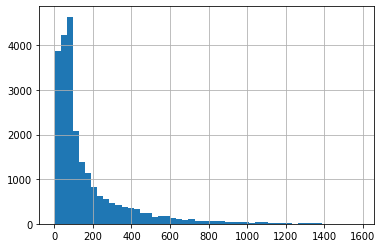

In [99]:
df['total_images'].unique() # всё ок
df.query('floor > floors_total') # аномалий в этажах нет
df['kitchen_area'].sort_values()
df.query('kitchen_area < 4.5')
df.loc[(df['studio']) & (df['kitchen_area'] != 0), 'kitchen_area'] = 0 
df.query('studio & kitchen_area != 0')
df['studio'].value_counts()
df.query('0 < kitchen_area < 4.5') # маленькие кухни пугают, но в целом коррелируют с общей и жилой площадью в объектах среза
df['balcony'].unique() 
df.query('balcony > 3') # не могу представить себе квартиры с 4 и более балконами, особенно когда речь о 2-хкомнатных в многоэтажках
# есть предположение, что в ячейке может быть указано не число, а площадь балкона, но как отсеять внесенные площади вместо чисел - не очень понятно 

df['days_exposition'].describe()
df['days_exposition'].hist(bins=50) #вполне похоже на распределение Пуассона, аномалии вычищать не будем
plt.show()

#### Выводы по шагу 2.4
Во многих столбцах встречаются явно аномальные, странные или просто удивительные значения. Некоторые из них можно списать на неоднородность рынка недвижимости (особенно когда речь идет о площади кухонь). Некоторые, вероятно, случайно скопированы из соседних столбцов (значения совпадают). Пришлось устранить явные аномалии в количестве этажей (таких жилых зданий в реальности в данном регионе нет) и высоте потолков (как слишком высокой, так и слишком низкой). 

### Добавим в таблицу новые столбцы

Добавим такие столбцы, как:
* цена за квадратный метр;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

In [72]:
df['sq_m_price'] = df['last_price'] / df['total_area']
df['sq_m_price']
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['month']
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['year']
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday']

def cat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['cat_floor'] = df.apply(cat_floor, axis=1)

df['center_km'] = df['cityCenters_nearest'] / 1000
df['center_km'] = df['center_km'].round()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23498 entries, 0 to 23497
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23498 non-null  int64         
 1   last_price            23498 non-null  int64         
 2   total_area            23498 non-null  float64       
 3   first_day_exposition  23498 non-null  datetime64[ns]
 4   rooms                 23498 non-null  int64         
 5   ceiling_height        23498 non-null  float64       
 6   floors_total          23498 non-null  int64         
 7   living_area           21625 non-null  float64       
 8   floor                 23498 non-null  int64         
 9   is_apartment          23498 non-null  bool          
 10  studio                23498 non-null  bool          
 11  open_plan             23498 non-null  bool          
 12  kitchen_area          21409 non-null  float64       
 13  balcony         

### Исследовательский анализ данных

#### Построим графики, отображающие распределение данных в разных столбцах. 

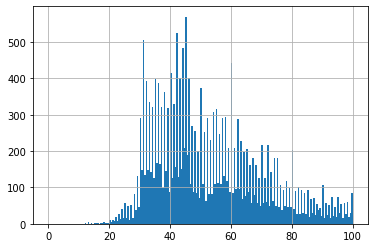

19745     12.0
19393     13.0
19650     13.0
17825     13.0
19405     13.2
         ...  
5317     590.0
15545    618.0
3099     631.0
12772    631.2
19387    900.0
Name: total_area, Length: 23498, dtype: float64

In [73]:
df['total_area'].hist(bins=200, range=(0, 100))
plt.show()
df['total_area'].sort_values()

1) total_area: Большинство продаваемых объектов недвижимости - от 27 до 80 кв.метров, хотя отдельные значения доходят до 400, 600 и даже 900 кв.м. График похож на нормальное распределение. Видны пиковые (типичные) значения для однокомнатных квартир в районе 32 кв.м, для двухкомнатных в районе 42-45 кв.м.

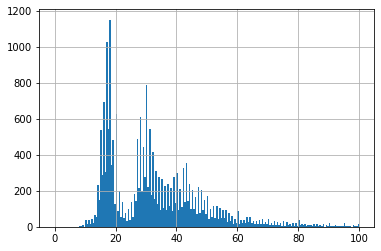

In [74]:
df['living_area'].hist(bins=200, range=(0,100))
plt.show()

2) living_area: странный провал в районе 24 кв.м между пиками в районе 18-20 и 26-27 кв.м. Вероятно, объясняется разницей между 1- и 2-хкомнатными квартирами. Отдельный небольшой пик в районе 45 кв.м. - вероятно, для типовых трехкомнатных квартир.

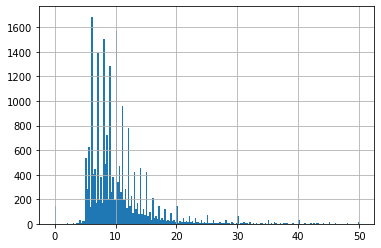

In [75]:
df['kitchen_area'].hist(bins=200, range=(0,50))
plt.show()

3) kitchen_area: график похож на нормальное распределение, большинство значений собраны в диапазоне 7-13 кв.м., что соответствует общепринятым представлениям о действительности.

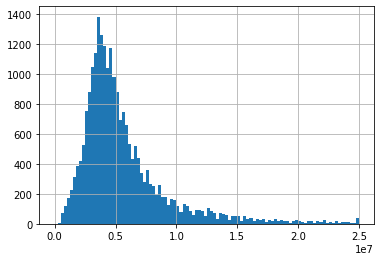

In [76]:
df['last_price'].hist(bins=100, range=(0,25000000))
plt.show()

4) last_price: график без range описывать невозможно, на range до 10 млн за квартиру практически идеальное нормальное распределение с вершиной в 4 млн рублей. Выглядит логично.

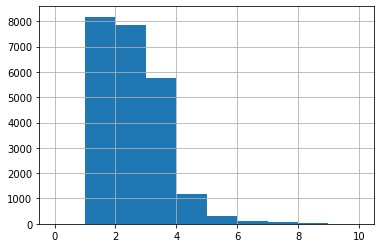

19

In [77]:
df['rooms'].hist(bins=10, range=(0,10))
plt.show()
df['rooms'].max()

5) rooms: манипуляции с параметрами гистограммы позволили получить чёткую картину по количеству комнат. Больше всего в продаже однокомнатных, совсем чуть-чуть уступают двухкомнатные, трёхкомнатных примерно на четверть меньше, от 4 комнат и больше начинаются редкие значения.

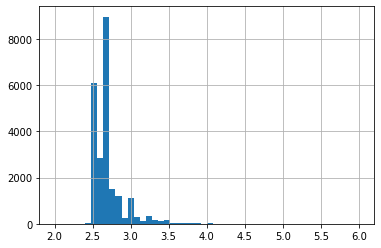

In [78]:
df['ceiling_height'].hist(bins=50, range=(2,6))
plt.show()

6) ceiling_height: график соответствует представлениям о реальности: потолков высотой 2.5 м много, но больше - более комфортных значений в районе 2.7 м. До 3.5 м наблюдается существенное количество значений (Петербург, как-никак), дальше - единицы, которых на гистограмме не видно.

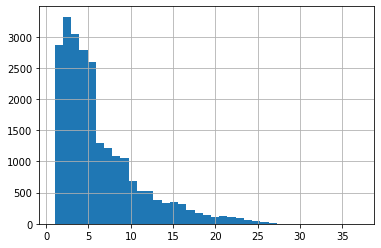

In [79]:
df['floor'].hist(bins=37, range=(1,37))
plt.show()

7) floor: крайне логичный график: чем выше этаж, тем меньше домов с такой этажностью и, соответственно, предложений на рынке. Любопытно, что первый этаж уступает второму и третьему, возможно, это объясняется тем, что первый этаж часто занят магазинами и другими нежилыми помещениями. Большинство зданий в датасете, вероятно, пятиэтажки.

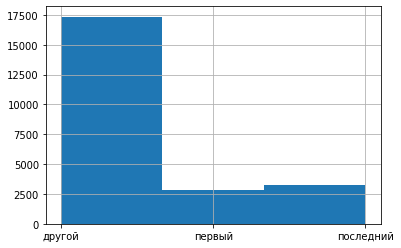

другой       17344
последний     3285
первый        2869
Name: cat_floor, dtype: int64

In [80]:
df['cat_floor'].hist(bins=3)
plt.show()
df['cat_floor'].value_counts()

8) cat_floor: предсказуемо больше этажей категории "другой", превосходство последних этажей над первыми можно также объяснять тем, что первый этаж часто занят магазинами и другими нежилыми помещениями. Большинство зданий в датасете, вероятно, пятиэтажки.

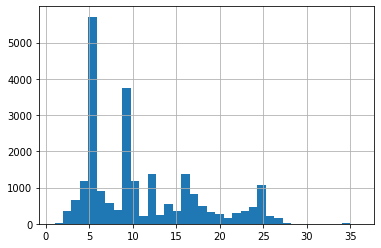

In [81]:
df['floors_total'].hist(bins=36, range=(1,36))
plt.show()

9) floors_total: гипотеза подтвердилась: большинство зданий в датасете - пятиэтажные. Другие пики (вполне предсказуемые) - девятиэтажки, шестнадцатиэтажки и здания в 12 и 25 этажей.

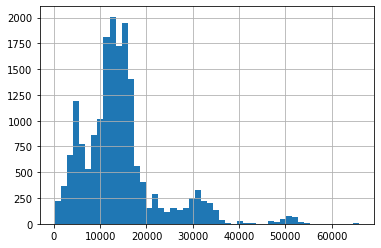

In [82]:
df['cityCenters_nearest'].hist(bins=50)
plt.show()

10) расстояние до центра города: интересен пик в районе 7500 м от центра, а также небольшой пик чуть за 30 км. Вероятно, там расположены какие-то густонаселенные микрорайоны.

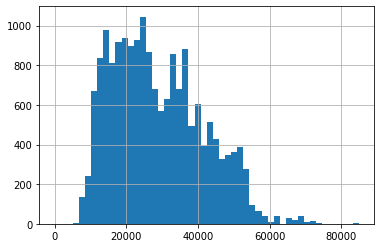

In [83]:
df['airports_nearest'].hist(bins=50)
plt.show()

11) расстояние до аэропорта: ближе чем в 7-8 км от аэропорта домов нет (что коррелирует с моими представлениями о географии Петербурга).

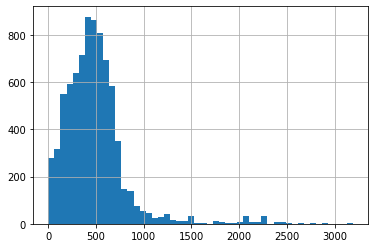

In [84]:
df['parks_nearest'].hist(bins=50)
plt.show()

12) расстояние до парков: выглядит так, словно Петербург - зелёный город: подавляющее большинство квартир имеют парковые зоны не далее, чем в километре от дома.

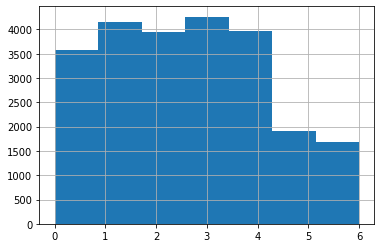

In [85]:
df['weekday'].hist(bins=7)
plt.show()

13) день недели: в выходные публикуется примерно в 2 раза меньше объявлений (логично, все хотят отдыхать), пик активности приходится на четверг.

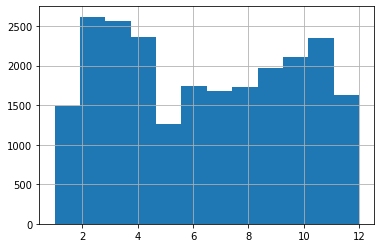

In [86]:
df['month'].hist(bins=12)
plt.show()

14) месяц: меньше всего объявлений появляется до и после нового года, наибольшая активность - с февраля по апрель и в ноябре. Сильно проседает май, вероятно, из-за длинных праздников и начала дачного сезона.

#### Отдельно рассмотрим столбец days_exposition.

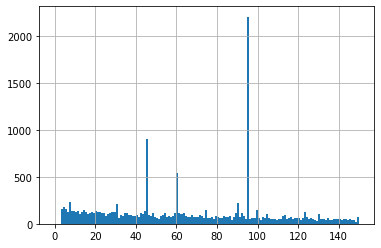

count    23498.000000
mean       170.216657
std        207.289831
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [87]:
df['days_exposition'].hist(bins=150, range=(0, 150))
plt.show()
df['days_exposition'].describe()

Сколько времени требуется, чтобы продать квартиру?
На графике по столбцу days_exposition видим пик в районе 100 дней, что примерно совпадает с медианой, составляющей 95 дней. Отметим, что это то медианное значение, которым мы заполняли пропуски в этом столбце.  
Тем не менее, быстрыми продажами можно считать те, которые составляют первый квартиль данных столбца - до 45 дней. Аномально долгими - все, превышающие 200 дней.

Любопытно, что на графике видим явные пики на значениях 45, 60 и 95 дней. Вероятно, это техническая особенность самой платформы: возможно, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил.


#### Определим факторы, влияющие на стоимость объекта

0.6531234300439166

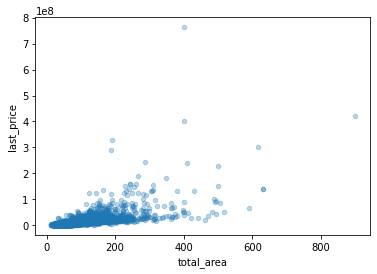

In [88]:
display(df['last_price'].corr(df['total_area']))
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

0.5675309427225121

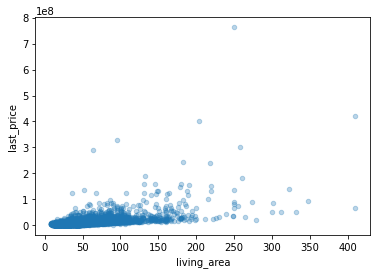

In [89]:
display(df['last_price'].corr(df['living_area']))
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

0.519409380171857

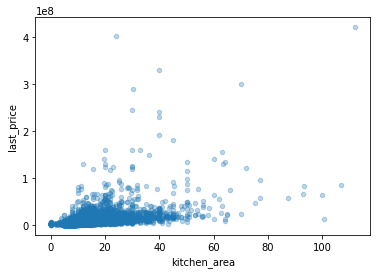

In [90]:
display(df['last_price'].corr(df['kitchen_area']))
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

0.3662742720089214

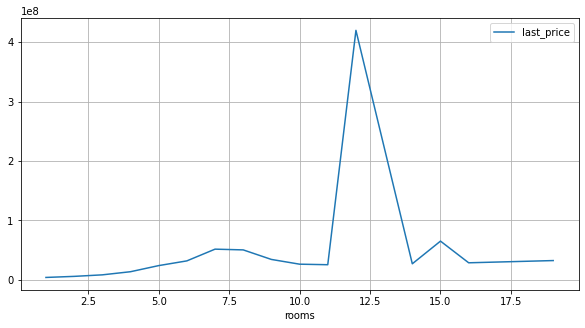

In [91]:
display(df['last_price'].corr(df['rooms']))
df.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(10,5))
plt.show()

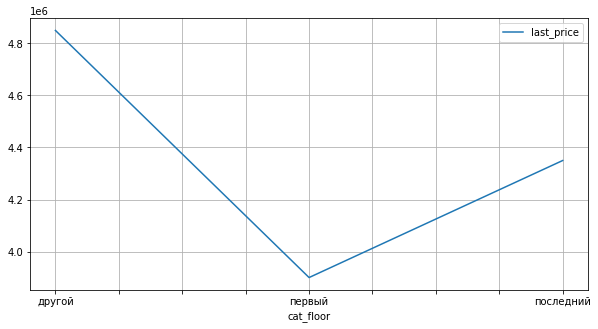

In [92]:
df.pivot_table(index='cat_floor', values='last_price', aggfunc='median').plot(grid=True, figsize=(10,5))
plt.show()

0.002048090055384704

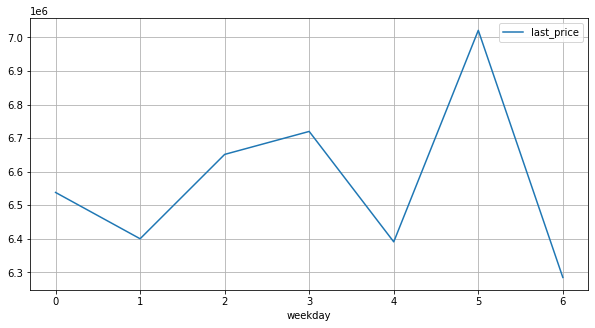

In [93]:
display(df['last_price'].corr(df['weekday']))
df.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(10,5))
plt.show()

0.0023120980137588416

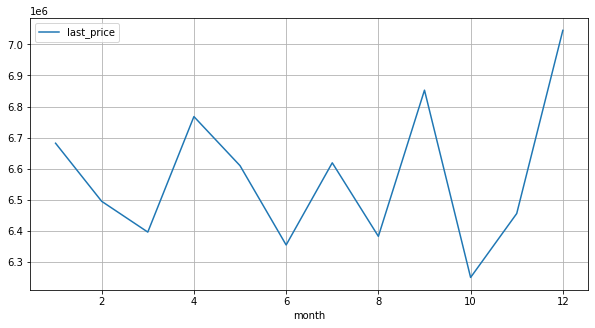

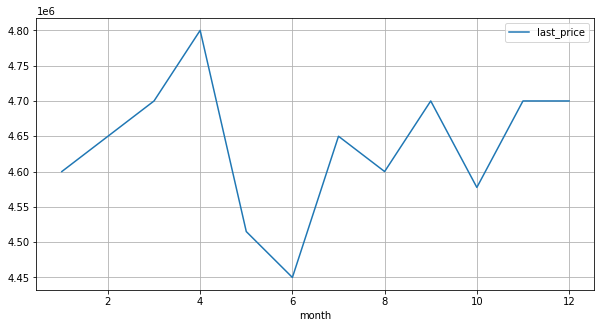

In [94]:
display(df['last_price'].corr(df['month']))
df.pivot_table(index='month', values='last_price', aggfunc='mean').plot(grid=True, figsize=(10,5))
df.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, figsize=(10,5))
plt.show()

-0.04243244803162441

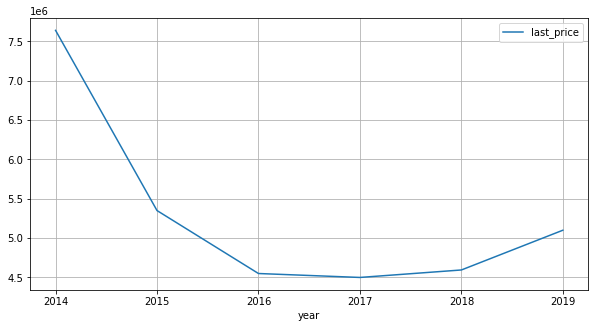

In [95]:
display(df['last_price'].corr(df['year']))
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, figsize=(10,5))
plt.show()

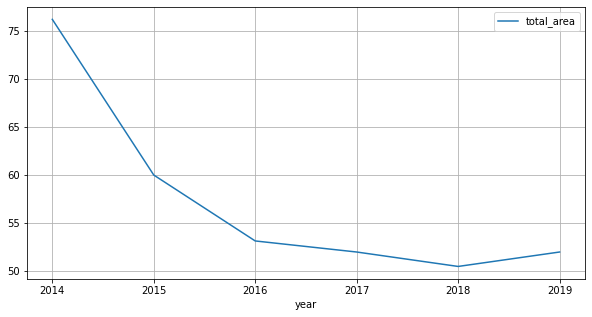

In [96]:
df.pivot_table(index='year', values='total_area', aggfunc='median').plot(grid=True, figsize=(10,5))
plt.show()

__Выводы по графикам__  
Больше всего цена зависит от общей площади квартиры, что подтверждают как график, так и коэффициент корреляции Пирсона. Сильна зависимость и от жилой площади (0,57) и растущая тенденция на графика, и от площади кухни (0,52).  Наличествует слабая корреляция цены с количеством комнат (причем самое дорогое жилье резко "пикует" в 12-комнатных квартирах).  

Предсказуемо дешевле квартиры на последнем и особенно первом этажах.

Не наблюдается корреляции между ценой и днём недели или месяцем публикации объявления (хотя есть любопытные закономерности: чаще всего дорогие квартиры выставляются на продажу в субботу, хотя, как мы видели выше, общее количество объявлений в субботу в два раза меньше, чем в будни).

Разные картины дают графики по средней и медианной ценам продажи по месяцам, но в обоих случаях можно говорить о пиках в апреле, сентябре и конце года и летнем спаде.  

Наконец, нет корреляции между годом публикации объявления и ценой продажи, но график легко объясняется, с одной стороны, геополитическими причинами (санкционные риски и рост курса валют в 2014 году и постепенная стабилизация ситуации, затем рост цен на фоне роста доступности ипотеки с 2018-19 гг.), с другой, очень похожей линией графика зависимости площади продаваемых квартир от года выставления их на продажу. Получается, что после 2014 медианная площадь выставляемых на продажу квартир резко упала. Однако начало роста цен в 2018-2019 всё ещё наблюдается.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений


In [97]:
df['locality_name'].value_counts().head(10)
top_ten = df.query('locality_name in ("Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")')
top_ten = top_ten.pivot_table(index='locality_name', values='sq_m_price', aggfunc='mean').reset_index()
top_ten = top_ten.sort_values(by='sq_m_price', ascending=False)
top_ten

,locality_name,sq_m_price
8,Санкт-Петербург,114802.981069
7,Пушкин,103125.819291
4,Кудрово,95324.930544
6,Парголово,90175.913458
5,Мурино,86061.677014
9,Шушары,78677.364217
3,Колпино,75424.579098
2,Гатчина,68746.146763
0,Всеволожск,68654.473986
1,Выборг,58141.909153


Видим, что самый дорогой квадратный метр - в Санкт-Петербурге, самый дешевый - в Выборге, который, в отличие от остальных наименований из топ-10, не пригород СПб, а город в 150 км.

,center_km,last_price
center_km,1.000000,-0.761284
last_price,-0.761284,1.000000


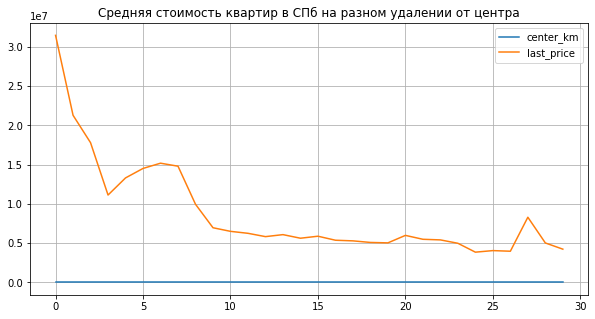

In [98]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb = spb.pivot_table(index='center_km', values='last_price', aggfunc='mean').reset_index()
spb.plot(grid=True, figsize=(10,5), title = 'Средняя стоимость квартир в СПб на разном удалении от центра')
spb.corr()

**ВЫВОД** И коэффициент корреляции, и визуализация на графике указывают на сильную тенденцию: чем дальше квартира от центра, тем дешевле. Временами график перерастает в рост, что может быть связано с дорогими кварталами (новостроек?) на некоторых расстояниях.

### Общий вывод

Данное исследование рынка недвижимости в Санкт-Петербурге и Ленинградской области потребовало довольно масштабной предобработки данных. Я обработал пропуски в различных столбцах (особенно много в столбцах про высоту потолков, балконы и статус апартаментов), подкорректировал тип данных в числовых и булевых столбцах, устранил неявные дубликаты (больше всего - в названиях населённых пунктов) и аномальные значения (прежде всего, в потолках и площадях).

Помимо представленных данных, подсчитал новые, которые помогли мне в анализе: средняя цена за квадратный метр по населённым пунктам, разбивку по дням недели, месяцам и годам публикации объявлений, категоризацию по типу этажа и отдаленности от центра.

Наконец, были составлены и проанализированы графики для визуализации тенденций и пиковых значений по разным параметрам.

На мой взгляд, исследование не дало каких-то удивительных выводов: цены квартир зависят прежде всего от общей площади и близости к центру. Любопытные выводы можно сделать касательно самых частотных дней для публикации объявлений (в целом четверг, но для элитного жилья - суббота) и месяцев с наибольшей активностью продавцов и сезонным ростом цен (апрель, сентябрь, предновогодний период). 

В дальнейшем, возможно, стоило бы предложить разработчикам введение таких функций, как выбор населенного пункта из выпадающего списка (для избежания появления неявных дубликатов), аналогичный выбор количества балконов, возможно, проверку заполнения графы "высота потолков" и минимальные и максимальные в ней значения, соответствующие законодательным нормам.